# CNN Model for Image Classification

### Importing Libraries

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input

- Initializing sequential model
- Adding 2 Convolutional layers for feature extraction
- Adding 2 Max Pooling layers for down sampling

In [4]:
classifier = Sequential()

classifier.add(Input(shape=(64,64,3)))

classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())

# Introduce non linearity required for image classifier
classifier.add(Dense(units=128, activation='relu'))

# By making use of sigmoid activation function we can get the probability of the image being a dog or a cat
classifier.add(Dense(units=1, activation='sigmoid'))

### Compile the model

In [5]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Import ImageDataGenerator for data augmentation
- Introduce roation, width shift, height shift, shear, zoom, horizontal flip, vertical flip
- This will help in increasing the number of images in the dataset and hence improve the model performance

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
        )

# scale the pixel values to be in the range of 0-1
test_datagen = ImageDataGenerator(rescale=1./255)

### Importing the dataset

In [7]:
train_set = train_datagen.flow_from_directory(
            'dataset/training_set',
            target_size=(64, 64),
            batch_size=batch_size,
            class_mode='binary'
        )

test_set = test_datagen.flow_from_directory(
            'dataset/test_set',
            target_size=(64, 64),
            batch_size=batch_size,
            class_mode='binary'
        )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fit the model

In [8]:


predicted_data = classifier.fit(
            train_set,
            steps_per_epoch=8000 // batch_size,
            epochs=20,
            validation_data=test_set,
            validation_steps=2000 // batch_size
        )

Epoch 1/20


c:\Users\91831\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 196s 767ms/step - accuracy: 0.5342 - loss: 0.8682 - val_accuracy: 0.6542 - val_loss: 0.6394
Epoch 2/20


c:\Users\91831\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.6000
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 426ms/step - accuracy: 0.6251 - loss: 0.6452 - val_accuracy: 0.5963 - val_loss: 0.6590
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6174
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.6726 - loss: 0.6129 - val_accuracy: 0.6593 - val_loss: 0.6182
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.7030
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.6816 - loss: 0.5934 - val_accuracy: 0.7228 - val_loss: 0.5604
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5839
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 

### Visualizing the model performance

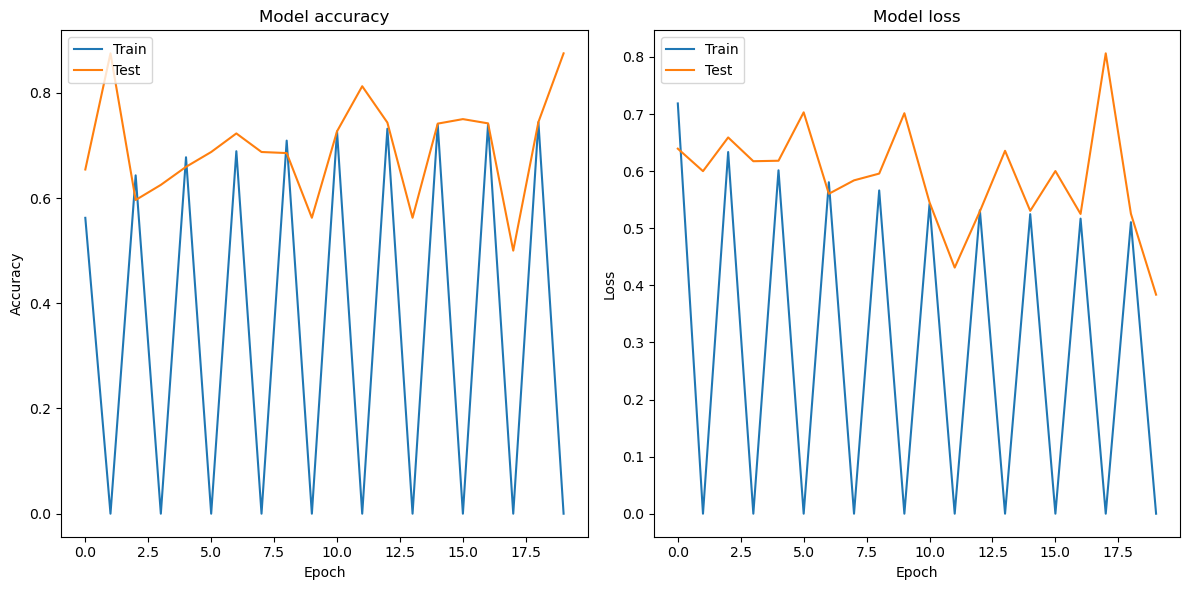

In [10]:
import matplotlib.pyplot as plt

# Assuming that 'history' is the History object returned by the fit method
history_dict = predicted_data.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()